       width     height  label
0  21.959384  31.239567      0
1  23.635916  36.468215      1
2  17.714056  31.441704      0
3  21.780200  33.213398      1
4  25.206306  36.558816      1
(150, 3)


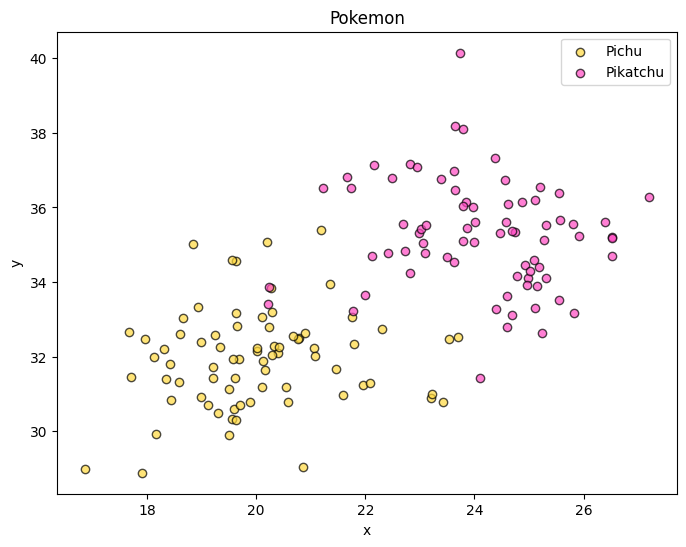

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("datapoints.txt", header =0, names=["width", "height", "label", "extra"])
df = df[["width", "height", "label"]]
print(df.head())
print(df.shape)

x = df["width"]
y = df["height"]

plt.figure(figsize=(8,6), dpi=100)

for label, group in df.groupby("label"):
    color = "#FFD93F" if label == 0 else "#FF2049"
    pokemon = "Pichu" if label == 0 else "Pikatchu"
    plt.scatter(group["width"], group["height"], 
                c=color, label= pokemon, alpha=0.7, edgecolor = "#000000")

plt.title("Pokemon")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()



In [2]:
import pandas as pd

df = pd.read_csv("testpoints.txt")

print(df.head())
print(df.shape)

print(df.iloc[0])


         Test points:
1. (25            32)
2. (24.2        31.5)
3. (22            34)
4. (20.5          34)
(4, 1)
Test points:     32)
Name: 1. (25, dtype: object


[25.0, 32.0] classified as Pikatchu
[24.2, 31.5] classified as Pikatchu
[22.0, 34.0] classified as Pikatchu
[20.5, 34.0] classified as Pichu


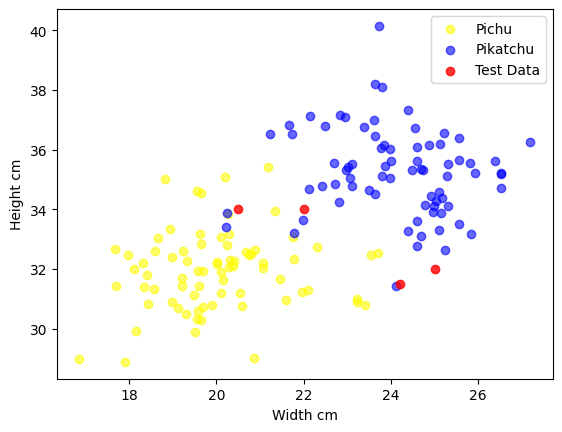

In [98]:
import matplotlib.pyplot as plt
import re
import numpy as np

dataPoints = []
testData = []

def eucledian_distance(p1, p2, q1 , q2):
    distance = np.sqrt((p1 - q1)**2 + (p2 - q2)**2)
    return distance

with open("datapoints.txt", "r") as textfile:
    for line in textfile:
        row = line.strip().split(", ")

        dataPoints.append(row)

with open("testpoints.txt", "r") as test:
    for line in test:
        row = line.strip().split()
        testData.append(row)

testData.pop(0)
testData = [[x[1], x[2]] for x in testData]

cleanedTestData = []
for row in testData:
    new_Row = []
    for i in row:
        cleaned = re.sub(r"[(),]", "", i)
        new_Row.append(float(cleaned))
    cleanedTestData.append(new_Row) 


dataPoints[0] = ["Width cm", "Height cm", "Lable"]

pointsGroup0 = [[float(i) for i in x] for x in dataPoints if x[2] == "0"]
pointsGroup1 = [[float(i) for i in x] for x in dataPoints if x[2] == "1"]

dataPointsClean = pointsGroup0 + pointsGroup1

pointsGroup0 = [(x[0], x[1]) for x in pointsGroup0]
pointsGroup1 = [(x[0], x[1]) for x in pointsGroup1]

Pichu_x = [x[0] for x in pointsGroup0]
Pichu_y = [x[1] for x in pointsGroup0]

Pikatchu_x = [x[0] for x in pointsGroup1]
Pikatchu_y = [x[1] for x in pointsGroup1]

Test_x = [x[0] for x in cleanedTestData]
Test_y = [x[1] for x in cleanedTestData]

k = 1

distancesFromTest = []

for pointX, pointY in zip(Test_x, Test_y):
    distances = []
    for point in dataPointsClean:
        distancefromTest = eucledian_distance(pointX, pointY, point[0], point[1])
        distances.append((distancefromTest, point[2]))

    distances.sort()    
    distancesFromTest.append(distances)
i = 0
for testpoint in distancesFromTest:
    
    Pikatchu_Neighbors = [x for x in testpoint[:k] if x[1] == 1]
    if len(Pikatchu_Neighbors) > k/2:
        print(f"{cleanedTestData[i]} classified as Pikatchu")
    else:
        print(f"{cleanedTestData[i]} classified as Pichu")
    i += 1
    

plt.figure(dpi= 100)
plt.scatter(Pichu_x, Pichu_y, color="#fffb00", alpha= 0.6, label= "Pichu")
plt.scatter(Pikatchu_x, Pikatchu_y, color="#0000ff", alpha= 0.6, label= "Pikatchu")
plt.scatter(Test_x, Test_y, color="#ff0000", alpha= 0.8, label= "Test Data")
plt.xlabel("Width cm")
plt.ylabel("Height cm")
plt.legend()

In [83]:
import re

testData = []

with open("testpoints.txt", "r") as test:
    for line in test:
        row = line.strip().split()
        testData.append(row)

testData.pop(0)
testData = [[x[1], x[2]] for x in testData]

cleanedTestData = []
for row in testData:
    new_Row = []
    for i in row:
        cleaned = re.sub(r"[(),]", "", i)
        new_Row.append(float(cleaned))
    cleanedTestData.append(new_Row)    


print(cleanedTestData)

[[25.0, 32.0], [24.2, 31.5], [22.0, 34.0], [20.5, 34.0]]


In [106]:
def Collect_from_user(numberOfPoints = 1):
    UserDataPoints = []
    for i in range(numberOfPoints):
        while True:
            try:
                userPoint_X = float(input(f"Point {i+1} - Enter the width in cm: "))
                userPoint_Y = float(input(f"Point {i+1} - Enter the height in cm: "))
                if userPoint_X <= 0 or userPoint_Y <= 0:
                    raise ValueError("Invalid input! Values for height and width must be a positive number")
            except ValueError:
                print("Invalid input, enter only numbers")
                continue
            else:
                UserDataPoints.append([userPoint_X, userPoint_Y])
                break
    return UserDataPoints
print(Collect_from_user(4))

[[22.0, 34.0], [13.0, 23.0], [23.0, 35.0], [29.0, 45.0]]
